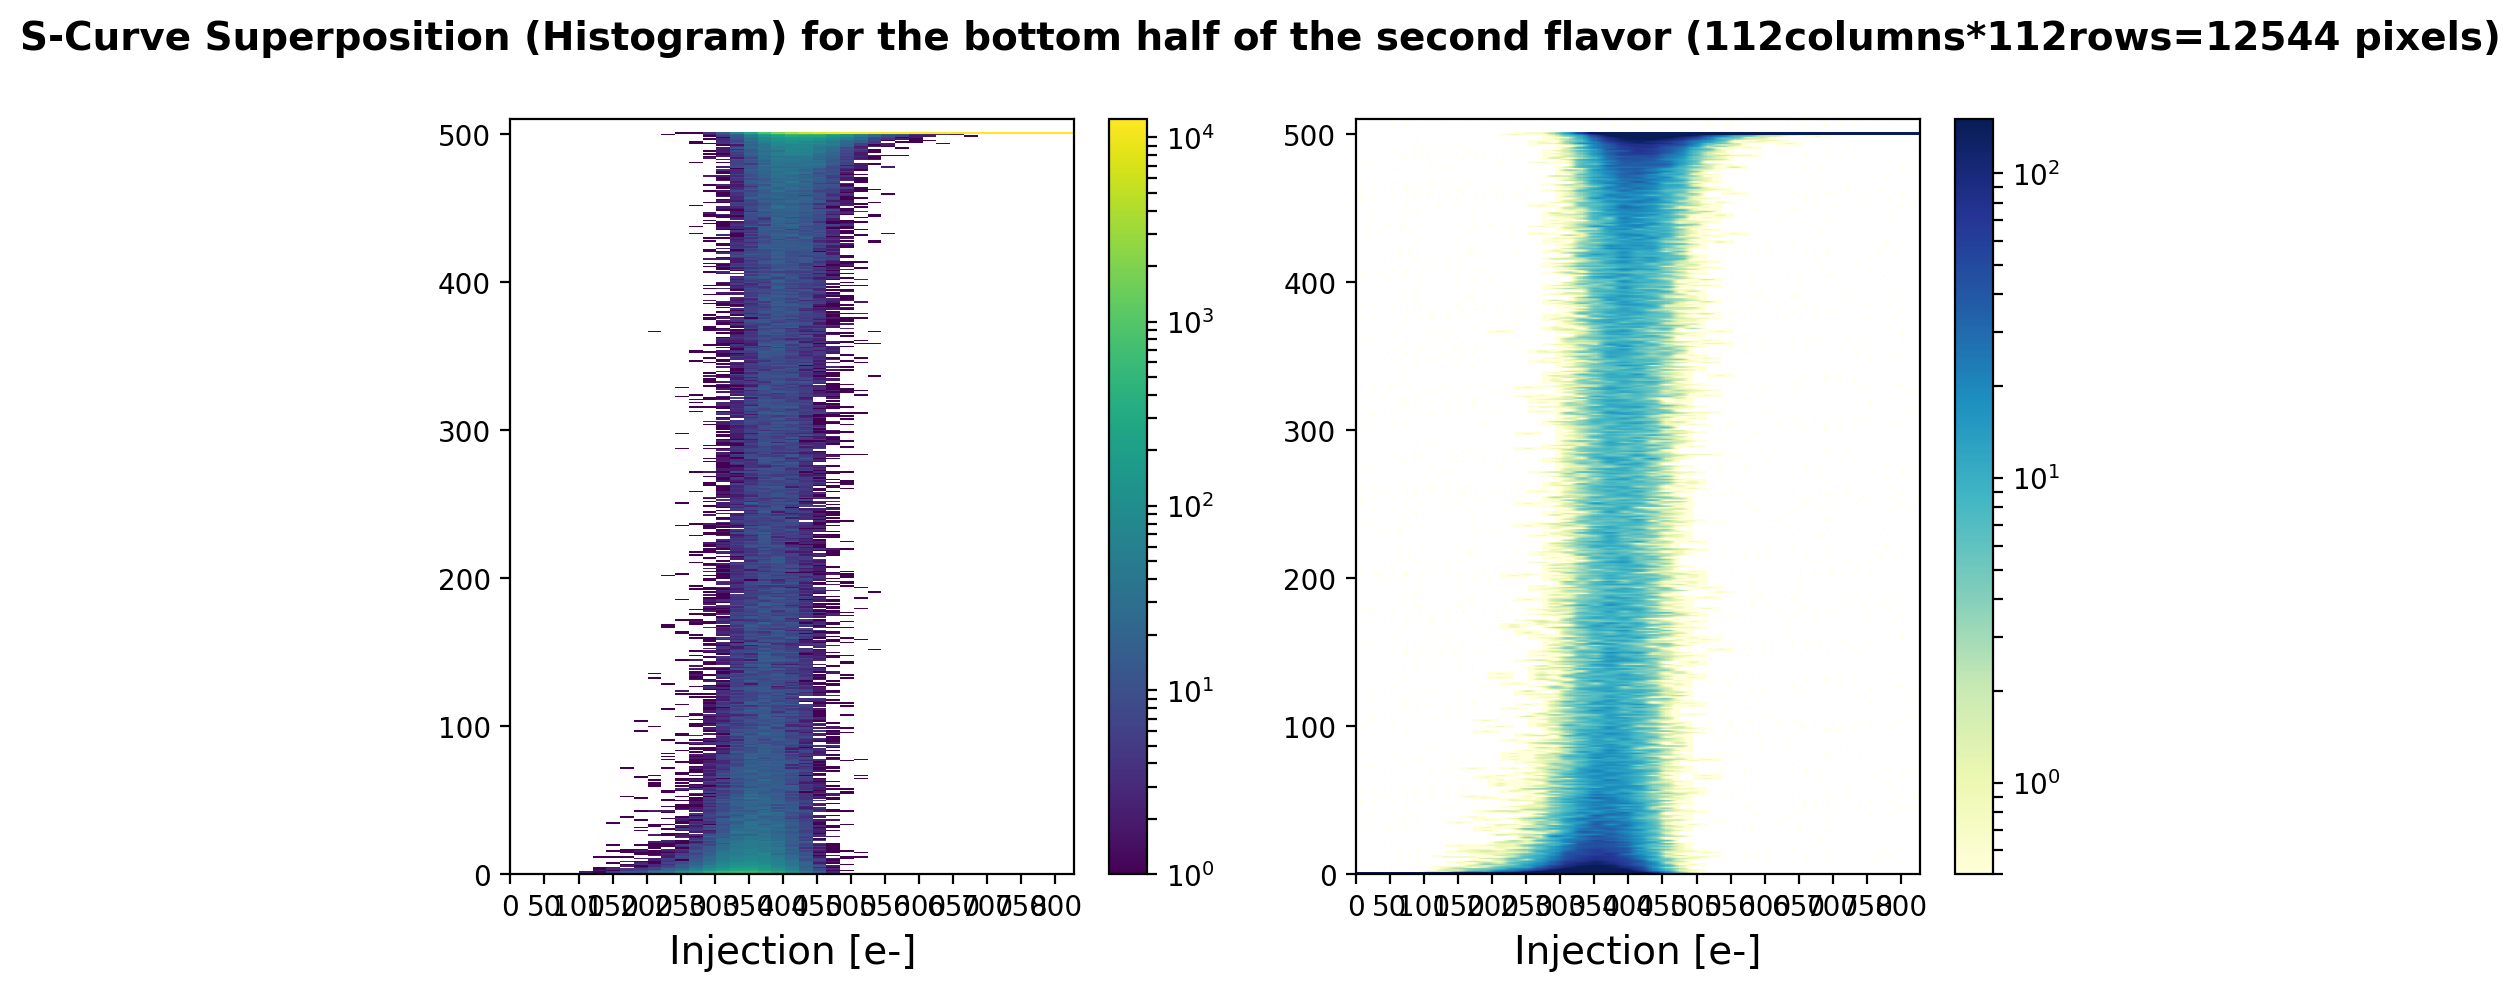

In [1675]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

VHLrange=40
repeat=500
max_occ = repeat + 10
DUtoe=20.18

scurves = np.load('scurvedatabot.npy')
scurves = np.delete(scurves, (np.where(~scurves.any(axis=1))[0]), axis=0)
scurves[:,0]=0
scurves[:,1]=0

param_count = scurves.shape[1]
ticks=np.arange(0, param_count*DUtoe, 50)

hist = np.empty([param_count, max_occ], dtype=np.uint32)
for param in range(param_count):
    hist[param] = np.bincount(scurves[:, param], minlength=max_occ)[:max_occ]
             
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), dpi=200)

p1 = ax1.imshow(hist.T, norm=colors.LogNorm(), aspect='auto', origin='lower', extent=[0, param_count*DUtoe, 0, max_occ])
ax1.set(xlabel='Injection [e-]', xticks=ticks)
p1.set_interpolation('None')
# p1 = ax1.pcolormesh(np.arange(0, param_count*DUtoe, DUtoe), range(max_occ), hist.T, norm=colors.LogNorm())
# ax1.set(xlabel='Injection [e-]', xticks=ticks)
p2 = ax2.imshow(hist.T, norm=colors.LogNorm(), aspect='auto', origin='lower', cmap='YlGnBu', extent=[0, param_count*DUtoe, 0, max_occ], vmin=0.5, vmax=150)
ax2.set(xlabel='Injection [e-]', xticks=ticks)
p2.set_interpolation('hamming')
cb1 = fig.colorbar(p1, ax=ax1)
cb1 = fig.colorbar(p2, ax=ax2)
figtitle = fig.suptitle('S-Curve Superposition (Histogram) for the bottom half of the second flavor (112columns*112rows=12544 pixels)', fontsize=14, fontweight='bold')
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] +
             [ax2.title, ax2.xaxis.label, ax2.yaxis.label]):
             #ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(14)

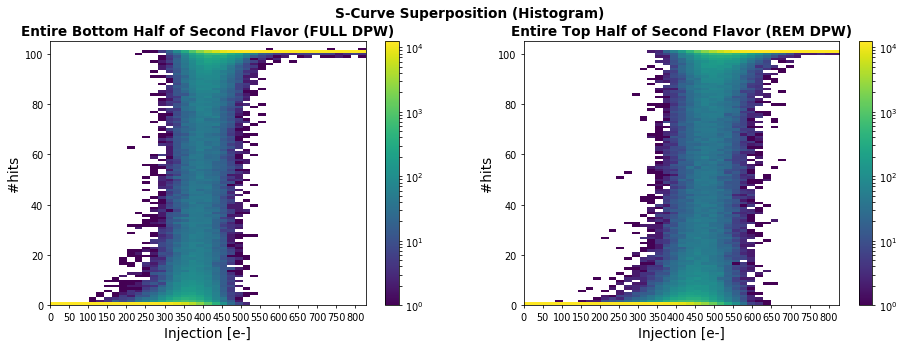

In [1637]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

VHLrange=40
repeat=100
max_occ = repeat + 5
DUtoe=20.18
ticks=np.arange(0, param_count*DUtoe, 50)

scurves = np.load('scurvedatabot.npy')
scurves = np.delete(scurves, (np.where(~scurves.any(axis=1))[0]), axis=0)
scurves[:,0]=0
scurves[:,1]=0

param_count = scurves.shape[1]

hist = np.empty([param_count, max_occ], dtype=np.uint32)
for param in range(param_count):
    hist[param] = np.bincount(scurves[:, param], minlength=max_occ)[:max_occ]
             
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5), dpi=70)

p1 = ax1.imshow(hist.T, norm=colors.LogNorm(), aspect='auto', origin='lower', extent=[0, param_count*DUtoe, 0, max_occ])
ax1.set(xlabel='Injection [e-]', ylabel='#hits',xticks=ticks, title='Entire Bottom Half of Second Flavor (FULL DPW)')
p1.set_interpolation('nearest')

cb1 = fig.colorbar(p1, ax=ax1)
figtitle = fig.suptitle('S-Curve Superposition (Histogram)', fontsize=14, fontweight='bold')
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label]):
             #[ax2.title, ax2.xaxis.label, ax2.yaxis.label]):
             #ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(14)
ax1.title.set_fontweight('bold')



scurves = np.load('scurvedatatop.npy')
scurves = np.delete(scurves, (np.where(~scurves.any(axis=1))[0]), axis=0)
scurves[:,0]=0
scurves[:,1]=0

param_count = scurves.shape[1]

hist = np.empty([param_count, max_occ], dtype=np.uint32)
for param in range(param_count):
    hist[param] = np.bincount(scurves[:, param], minlength=max_occ)[:max_occ]
             
p1 = ax2.imshow(hist.T, norm=colors.LogNorm(), aspect='auto', origin='lower', extent=[0, param_count*DUtoe, 0, max_occ])
ax2.set(xlabel='Injection [e-]', ylabel='#hits',xticks=ticks, title='Entire Top Half of Second Flavor (REM DPW)')
p1.set_interpolation('nearest')

cb1 = fig.colorbar(p1, ax=ax2)

for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label]):
             #[ax2.title, ax2.xaxis.label, ax2.yaxis.label]):
             #ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(14)
ax2.title.set_fontweight('bold')

In [1647]:
from scipy.optimize import curve_fit
from scipy.special import erf

def scurvefit(x, A, mu, sigma):
    return 0.5 * A * erf((x - mu) / (np.sqrt(2) * sigma)) + 0.5 * A

start_dif=0
VHLrange=40
repeat=500
max_occ = repeat
DUtoe=20.18
threshold=350
s=14

xhits = np.arange(start_dif,VHLrange+start_dif+1)*DUtoe
scurves = np.load('scurvedata.npy')
#scurves = np.delete(scurves, (np.where(~scurves.any(axis=1))[0]), axis=0)      
scurves[:,0]=0
scurves[:,1]=0

thresholds = np.empty(scurves.shape[0], dtype=np.float32)
encs = np.empty(scurves.shape[0], dtype=np.float32)

for i in range(scurves.shape[0]):
    if ~np.any(scurves[i,:]):
        thresholds[i]=0
        encs[i]=0
    else:
        popt, _ = curve_fit(scurvefit, xhits, scurves[i,:], p0=[max_occ, threshold, s], check_finite=False)
        thresholds[i]=popt[1]
        encs[i]=popt[2]

np.save('threshold.npy',thresholds)
np.save('enc.npy',encs)

# for part in ('bot', 'top'):
#     xhits = np.arange(start_dif,VHLrange+start_dif+1)*DUtoe
#     scurves = np.load('scurvedata'+part+'.npy')
#     #scurves = np.delete(scurves, (np.where(~scurves.any(axis=1))[0]), axis=0)      
#     scurves[:,0]=0
#     scurves[:,1]=0

#     thresholds = np.empty(scurves.shape[0], dtype=np.float32)
#     encs = np.empty(scurves.shape[0], dtype=np.float32)

#     for i in range(scurves.shape[0]):
#         if ~np.any(scurves[i,:]):
#             thresholds[i]=0
#             encs[i]=0
#         else:
#             popt, _ = curve_fit(scurvefit, xhits, scurves[i,:], p0=[max_occ, threshold, s], check_finite=False)
#             thresholds[i]=popt[1]
#             encs[i]=popt[2]

#     np.save('threshold'+part+'.npy',thresholds)
#     np.save('enc'+part+'.npy',encs)

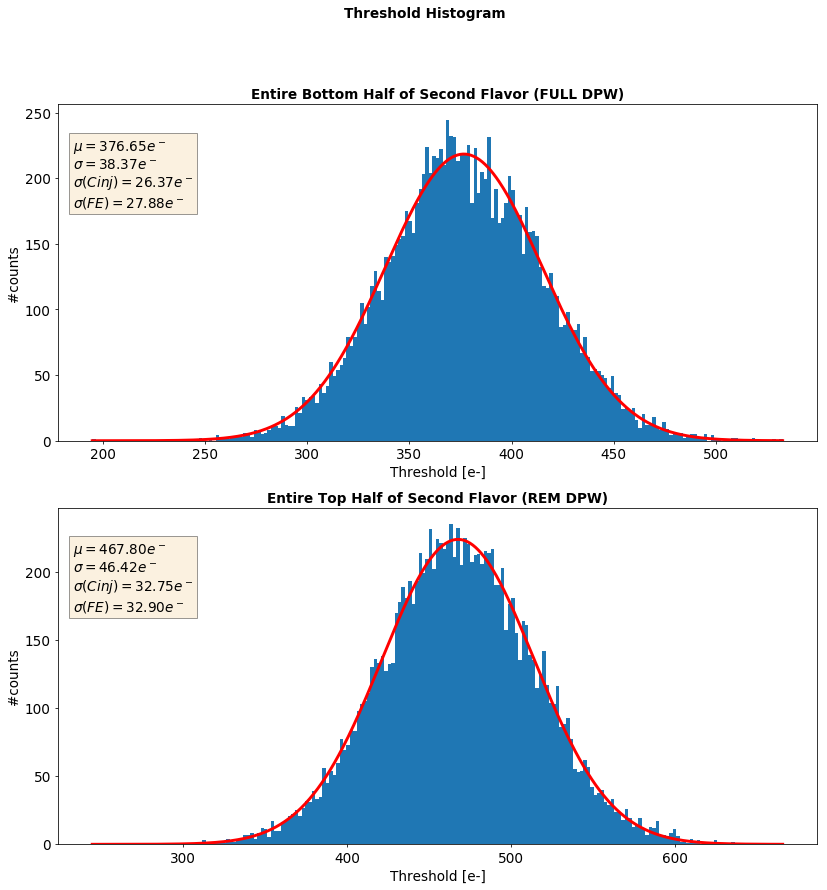

In [1649]:
from math import sqrt
def gauss(x, A, mu, sigma):
    return A * np.exp(- (x - mu)**2.0 / (2.0 * sigma**2.0))

thr = np.load('threshold.npy')
thrdelzero=np.delete(thr, (np.where(thr==0)[0]))

diff = np.amax(thr) - np.amin(thrdelzero)
if (np.amax(thr)) > np.median(thr)*5:
    plot_range = np.arange(np.amin(thrdelzero), np.median(thr)*5, diff/200.)
else:
    plot_range = np.arange(np.amin(thrdelzero), np.amax(thr)+diff/200., diff/200.)

tick_size = plot_range[1] - plot_range[0]

hist, bins =  np.histogram(thr, bins=plot_range)

bin_centres = (bins[:-1] + bins[1:]) / 2
p0 = (np.amax(hist), np.mean(bins), (max(plot_range)-min(plot_range))/3)

popt, _ = curve_fit(gauss, bin_centres, hist, p0=p0)
points = np.linspace(min(plot_range), max(plot_range), 500)
gau = gauss(points, *popt)
    
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(14,14), dpi=70)
b1 = ax1.bar(bins[:-1], hist, width=tick_size, align='edge')
g1 = ax1.plot(points, gau, "r-", linewidth='3')

sCinj=popt[1]*0.07
sFE=sqrt(((popt[2])**2.)-(sCinj**2))

textright = '$\mu=%.2fe^-$\n$\sigma=%.2fe^-$\n$\sigma(Cinj)=%.2fe^-$\n$\sigma(FE)=%.2fe^-$' % (abs(popt[1]), abs(popt[2]), sCinj, sFE)
ax1.set(xlabel='Threshold [e-]', ylabel='#counts', title='Entire Bottom Half of Second Flavor (FULL DPW)')
#props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
t1 = ax1.text(0.02, 0.7, textright, transform=ax1.transAxes, fontsize=14, bbox=dict(facecolor='wheat', alpha=0.4))
figtitle = fig.suptitle('Threshold Histogram', fontsize=14, fontweight='bold')
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] +
             ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(14)
ax1.title.set_fontweight('bold')    
    
    
    
thr = np.load('thresholdtop.npy')
thrdelzero=np.delete(thr, (np.where(thr==0)[0]))

diff = np.amax(thr) - np.amin(thrdelzero)
if (np.amax(thr)) > np.median(thr)*5:
    plot_range = np.arange(np.amin(thrdelzero), np.median(thr)*5, diff/200.)
else:
    plot_range = np.arange(np.amin(thrdelzero), np.amax(thr)+diff/200., diff/200.)

tick_size = plot_range[1] - plot_range[0]

hist, bins =  np.histogram(thr, bins=plot_range)

bin_centres = (bins[:-1] + bins[1:]) / 2
p0 = (np.amax(hist), np.mean(bins), (max(plot_range)-min(plot_range))/3)

popt, _ = curve_fit(gauss, bin_centres, hist, p0=p0)
points = np.linspace(min(plot_range), max(plot_range), 500)
gau = gauss(points, *popt)
    
b1 = ax2.bar(bins[:-1], hist, width=tick_size, align='edge')
g1 = ax2.plot(points, gau, "r-", linewidth='3')

sCinj=popt[1]*0.07
sFE=sqrt(((popt[2])**2.)-(sCinj**2))

textright = '$\mu=%.2fe^-$\n$\sigma=%.2fe^-$\n$\sigma(Cinj)=%.2fe^-$\n$\sigma(FE)=%.2fe^-$' % (abs(popt[1]), abs(popt[2]), sCinj, sFE)
ax2.set(xlabel='Threshold [e-]', ylabel='#counts', title='Entire Top Half of Second Flavor (REM DPW)')
t1 = ax2.text(0.02, -0.5, textright, transform=ax1.transAxes, fontsize=14, bbox=dict(facecolor='wheat', alpha=0.4))
for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
             ax2.get_xticklabels() + ax2.get_yticklabels()):
    item.set_fontsize(14)
ax2.title.set_fontweight('bold')

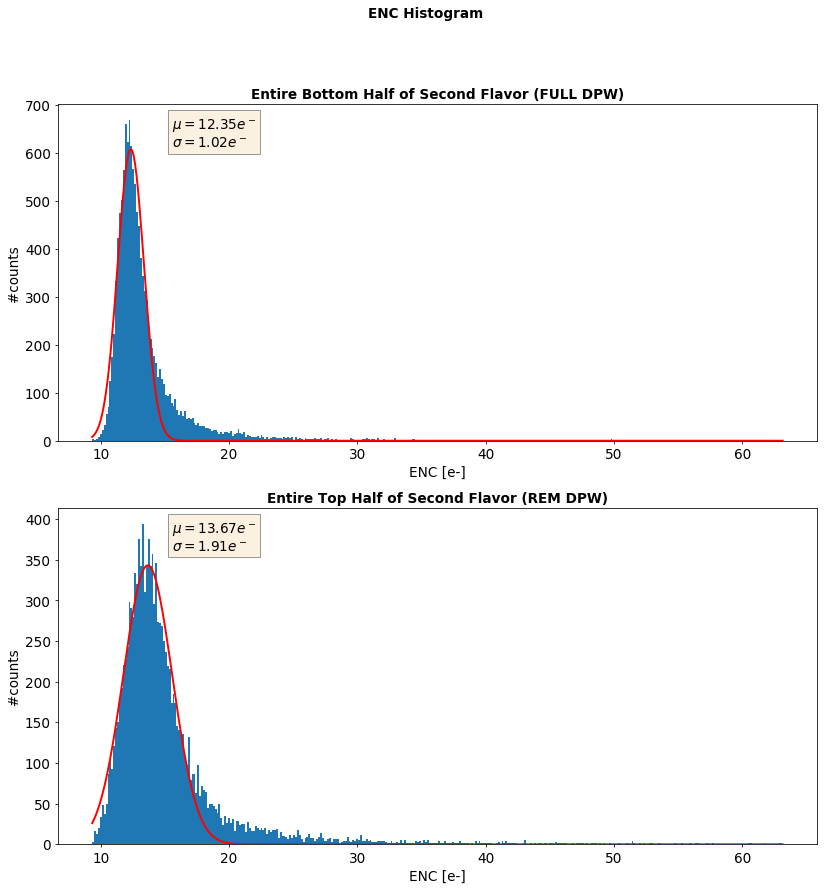

In [1661]:
enc = np.load('enc.npy')
encdelzero=np.delete(enc, (np.where(enc==0)[0]))

diff = np.amax(enc) - np.amin(encdelzero)
if (np.amax(enc)) > np.median(enc)*5:
    plot_range = np.arange(np.amin(encdelzero), np.median(enc)*5, diff/700.)
else:
    plot_range = np.arange(np.amin(encdelzero), np.amax(enc)+diff/700., diff/700.)
    

tick_size = plot_range[1] - plot_range[0]
hist, bins =  np.histogram(enc, bins=plot_range)

bin_centres = (bins[:-1] + bins[1:]) / 2
p0 = (np.amax(hist), np.mean(bins), (max(plot_range)-min(plot_range))/3)

popt, _ = curve_fit(gauss, bin_centres, hist, p0=p0)
points = np.linspace(min(plot_range), max(plot_range), 500)
gau = gauss(points, *popt)

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(14,14), dpi=70)
figtitle = fig.suptitle('ENC Histogram', fontsize=14, fontweight='bold')

b1 = ax1.bar(bins[:-1], hist, width=tick_size, align='edge')
g1 = ax1.plot(points, gau, "r-", linewidth='2')
textright = '$\mu=%.2fe^-$\n$\sigma=%.2fe^-$' % (abs(popt[1]), abs(popt[2]))
t1 = ax1.text(0.15, 0.88, textright, transform=ax1.transAxes, fontsize=14, bbox=dict(facecolor='wheat', alpha=0.4))
ax1.set(xlabel='ENC [e-]', ylabel='#counts', title='Entire Bottom Half of Second Flavor (FULL DPW)')
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] +
             ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(14)
ax1.title.set_fontweight('bold')
#ax1.set_yscale("log", nonposy='clip')    
    
enc = np.load('enctop.npy')
hist, bins =  np.histogram(enc, bins=plot_range)

p0 = (np.amax(hist), np.mean(bins), (max(plot_range)-min(plot_range))/3)
popt, _ = curve_fit(gauss, bin_centres, hist, p0=p0)
points = np.linspace(min(plot_range), max(plot_range), 500)
gau = gauss(points, *popt)

b1 = ax2.bar(bins[:-1], hist, width=tick_size, align='edge')
g1 = ax2.plot(points, gau, "r-", linewidth='2')
textright = '$\mu=%.2fe^-$\n$\sigma=%.2fe^-$' % (abs(popt[1]), abs(popt[2]))
t1 = ax2.text(0.15, -0.32, textright, transform=ax1.transAxes, fontsize=14, bbox=dict(facecolor='wheat', alpha=0.4))
ax2.set(xlabel='ENC [e-]', ylabel='#counts', title='Entire Top Half of Second Flavor (REM DPW)')
figtitle = fig.suptitle('ENC Histogram', fontsize=14, fontweight='bold')
for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
             ax2.get_xticklabels() + ax2.get_yticklabels()):
    item.set_fontsize(14)
ax2.title.set_fontweight('bold')
#ax2.set_yscale("log", nonposy='clip')

In [1655]:
enc = np.load('encbot.npy')
ee=np.where(enc > 80)[0]
print ee
len(ee)

[  295  1233  6438  7466  8154 11317]


6

[  0   0   0   0   0   1   3  19  38  31  61  81  94 108 126 152 149 181
 212 320 439 482 488 494 487 489 496 498 498 500 498 500 500 500 500 500
 500 500 500 500 500]
[505.58379177 346.97612076  82.71712931]


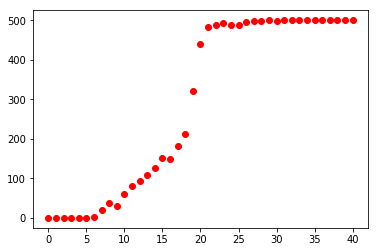

In [1658]:
scurves = np.load('scurvedata.npy')
scurves[:,0]=0
scurves[:,1]=0
pix=295
print scurves[pix,:]
popt, _ = curve_fit(scurvefit, xhits, scurves[pix,:], p0=[max_occ, threshold, s], check_finite=False)
print popt
pt=plt.plot(scurves[pix,:], 'ro')

In [1625]:
index=295
col = index // 112
row = index-col*112
print col
print row

2
71
